# Emigracia - ludia, ktori odchadzaju zo Slovenska

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# long table with data about emigration from Slovakia:
# locally saved file was:
emigr = pd.read_csv('..\Data\slovakia\slovak_emigration_international.csv')
# emigr = Erik_ulozil = 'pod menom...'
display(emigr)

,target_country,target_ISO3,target_region,target_sub_region,age,sex,country,country_ISO3,year,count
0,Andorra,AND,Europe,Southern Europe,TOTAL,Females,Slovakia,SVK,1998,0
1,Andorra,AND,Europe,Southern Europe,TOTAL,Females,Slovakia,SVK,1999,0
2,Andorra,AND,Europe,Southern Europe,TOTAL,Females,Slovakia,SVK,2000,0
3,Andorra,AND,Europe,Southern Europe,TOTAL,Females,Slovakia,SVK,2002,0
4,Andorra,AND,Europe,Southern Europe,TOTAL,Females,Slovakia,SVK,2003,0
...,...,...,...,...,...,...,...,...,...,...
251969,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,Y_LT5,Total,Slovakia,SVK,2019,0
251970,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,Y_LT5,Total,Slovakia,SVK,2020,0
251971,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,Y_LT5,Total,Slovakia,SVK,2021,0
251972,Zimbabwe,ZWE,Africa,Sub-Saharan Africa,Y_LT5,Total,Slovakia,SVK,2022,0


Celkova emigracia (kategoria: TOTAL) 1998 - 2023: 61301


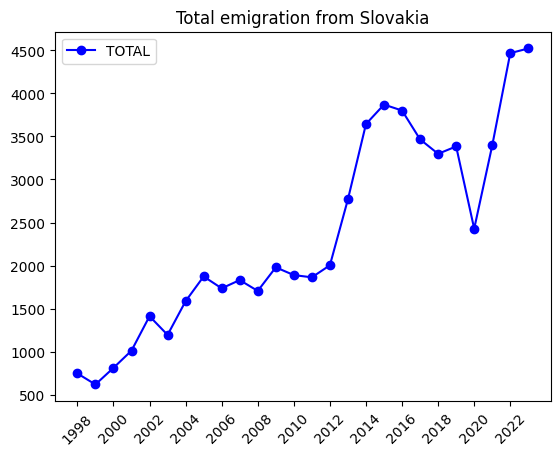

In [10]:
def draw_time_plot(axis, category, title):
    yearly_totals = emigr.query("age == @category and sex == 'Total' and target_country == 'Total'").groupby('year')['count'].sum()
    # display(yearly_totals)
    print(f"Celkova emigracia (kategoria: {category}) 1998 - 2023:", yearly_totals.sum())
    axis.plot(yearly_totals.index, yearly_totals, '-bo', label = category)
    axis.legend()
    axis.set_title(title)
    plt.xticks(list(range(1998,2024,2)), rotation = 45)
    return figure

figure, axis = plt.subplots()
figure = draw_time_plot(axis, 'TOTAL', 'Total emigration from Slovakia')
# figure = draw_time_plot(axis, 'Y25-29', '')

In [11]:
# toto potrebujem pre pouzitie funkcie v asylums... ziskat ISO3
country_names = ['Liechtenstein', 'Portugal', 'Bulgaria', 'Hungary', 'Spain', 'Poland',
       'Slovenia', 'Estonia', 'Cyprus', 'Luxembourg', 'Switzerland', 'Czechia',
       'Malta', 'Italy', 'Latvia', 'Romania', 'Slovakia', 'Iceland',
       'Montenegro', 'Greece', 'Belgium', 'Croatia', 'Norway', 'Netherlands',
       'Sweden', 'Denmark', 'EU-27', 'Germany', 'Ireland', 'Finland', 'France',
       'Austria', 'Lithuania', 'United Kingdom']

# coding horror - don't look
slovnik = dict()
for c in country_names:
    try:
        slovnik[c] = list(set(emigr.query("target_country == @c")['target_ISO3']))[0]
    except:
        print(c)
print(slovnik)


EU-27
{'Liechtenstein': 'LIE', 'Portugal': 'PRT', 'Bulgaria': 'BGR', 'Hungary': 'HUN', 'Spain': 'ESP', 'Poland': 'POL', 'Slovenia': 'SVN', 'Estonia': 'EST', 'Cyprus': 'CYP', 'Luxembourg': 'LUX', 'Switzerland': 'CHE', 'Czechia': 'CZE', 'Malta': 'MLT', 'Italy': 'ITA', 'Latvia': 'LVA', 'Romania': 'ROU', 'Slovakia': 'SVK', 'Iceland': 'ISL', 'Montenegro': 'MNE', 'Greece': 'GRC', 'Belgium': 'BEL', 'Croatia': 'HRV', 'Norway': 'NOR', 'Netherlands': 'NLD', 'Sweden': 'SWE', 'Denmark': 'DNK', 'Germany': 'DEU', 'Ireland': 'IRL', 'Finland': 'FIN', 'France': 'FRA', 'Austria': 'AUT', 'Lithuania': 'LTU', 'United Kingdom': nan}


Country: all
Average age of emigrant: 32.9
TOTAL = 61301
Sucet v age_categories (vratane total): 165106
Sucet po piatich rokoch = 51859


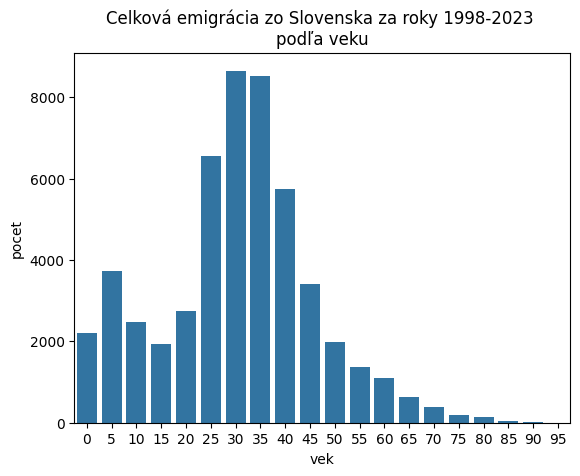

In [ ]:
def draw_age_histogram(axis = None, country = None, print_info = True, print_average = True):
    if country is None:
        age_categories = pd.DataFrame(emigr.query("sex == 'Total' and target_country == 'Total'").groupby('age')['count'].sum())
    else:
        age_categories = pd.DataFrame(emigr.query("sex == 'Total' and target_country == @country").groupby('age')['count'].sum())

    #display(age_categories)
    total = age_categories.loc['TOTAL']

    by_five_years = age_categories.drop(['TOTAL', 'UNK', 'Y_GE100', 'Y_GE65', 'Y_GE85','Y_LT15','Y15-64'])
    by_five_years.rename(index= {'Y_LT5':0,'Y10-14': 10,'Y15-19':15,'Y20-24':20,'Y25-29':25,'Y30-34':30,	'Y35-39':35,	'Y40-44':40,
                                'Y45-49':45,	'Y5-9'	:5,'Y50-54':50,	'Y55-59':55,'Y60-64':60,'Y65-69':65,'Y70-74':70,
                                'Y75-79':75,'Y80-84':80,'Y85-89':85,'Y90-94':90,'Y95-99':95,}, inplace = True )
    by_five_years.sort_index(inplace=True)

    podla_veku = sns.barplot(data = by_five_years, x = by_five_years.index, y = by_five_years['count'], align = 'edge', ax = axis)

    if print_average:
        z = []
        for i in by_five_years.index:
            z.append((i+2.5) * by_five_years.loc[i, 'count'])
        if country is None:
            print('Country: all')
        else:
            print('Country:', country)
        print('Average age of emigrant:', round(sum(z) / by_five_years.values.sum(), 1))

    if print_info:
        print('TOTAL =', total['count'])
        print('Sucet v age_categories (vratane total):', age_categories['count'].sum())
        print('Sucet po piatich rokoch =', by_five_years['count'].sum())
        # uz je to spravne zhruba...
        # print('Nieco tu nesedii! Zda sa, ze niektore vekove kategorie boli zaratane do TOTAL viackrat')
        # display(by_five_years)
    
    if country is None:
        podla_veku.set_title("Celková emigrácia zo Slovenska za roky 1998-2023 \npodľa veku")
        podla_veku.set_ylabel('pocet')
        podla_veku.set_xlabel('vek')
    else:
        podla_veku.set_title(f"Emigration from Slovakia into {country} through the years 1998-2023 \n by age")
        podla_veku.set_ylabel('count')
        podla_veku.set_xlabel('age')
        
draw_age_histogram()

In [13]:
# Copying function from useful-share.ipynb
import plotly.express as px

def draw_choropleth(data, column,range=None,save_name=None,title="",scale=""):
  if range is not None:
    fig = px.choropleth(
      data, locations=data.index, color=column,
      projection = "azimuthal equidistant",
      range_color=range
    )
  else:
      fig = px.choropleth(
      data, locations=data.index, color=column,
      projection = "azimuthal equidistant"
      )

  fig.update_geos(lonaxis_range= [-20, 40],lataxis_range= [30, 72])
  fig.update_layout(height=500, margin={"r":0,"t":50,"l":0,"b":30},
                    title={
        'text': title,
        'y':0.96,  # Position from top (0 to 1)
        'x':0.5,    # Center the title
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=18) })
  
  
  #I used Deepseek AI to write this code
  if save_name:
    try:
      fig.write_image(f"../Images/Maps/{save_name}.png", scale=4)
      print(f"Successfully saved to {save_name}.png")
    except Exception as e:
      print(f"Could not save PNG: {str(e)}")
      print("Install kaleido with: pip install -U kaleido")
  else:
    fig.show()

In [14]:
import sys
print(sys.executable)

c:\Python310\python.exe


In [15]:
into_countries = emigr.query("sex == 'Total' and age == 'TOTAL'").loc[:,['target_ISO3', 'count']].groupby('target_ISO3').sum()
print(into_countries['count'].sum())
display(into_countries)

draw_choropleth(into_countries, column = 'count', save_name=False, title = 'Emigration from Slovakia (1998-2023 total)')


# debug:
totals = emigr.query("age == 'TOTAL' and sex == 'Total'")
non_totals = emigr.query("age != 'TOTAL' and sex == 'Total'")

print("Sum of TOTAL:", totals['count'].sum())
print("Sum of other age categories:", non_totals['count'].sum())
print("TOTAL + others:", totals['count'].sum() + non_totals['count'].sum())
print("Total dataset (sex = 'Total') sum:", emigr.query("sex == 'Total'")['count'].sum())


54449


,count
target_ISO3,
ABW,3
AFG,7
AGO,3
AIA,0
ALB,5
...,...
WSM,0
YEM,2
ZAF,38


Sum of TOTAL: 145258
Sum of other age categories: 237457
TOTAL + others: 382715
Total dataset (sex = 'Total') sum: 382715


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Emigration into Czechia through years 1998 - 2023: 20503


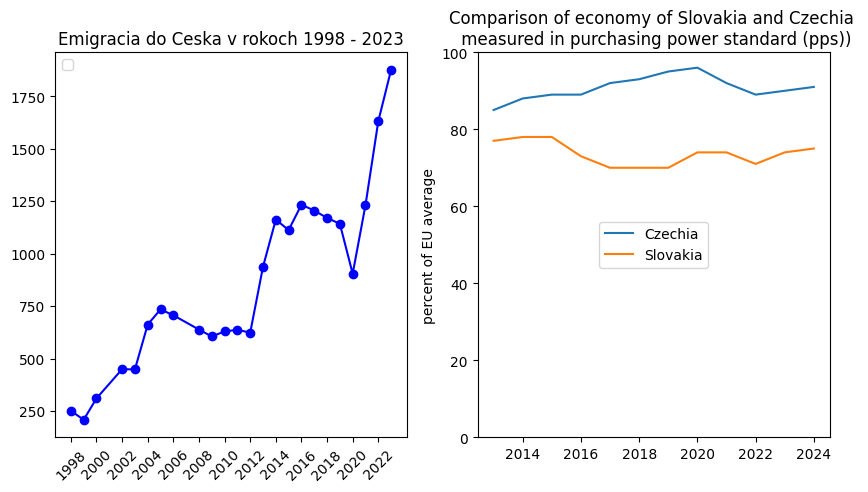

In [ ]:
def draw_country_time_plot(axis, country, title):
    yearly_totals = emigr.query("age == 'TOTAL' and sex == 'Total' and target_country == @country")\
                         .groupby('year')['count'].sum()

    print(f"Emigration into {country} through years 1998 - 2023:", yearly_totals.sum())
    axis.plot(yearly_totals.index, yearly_totals, '-bo')  # label added
    axis.legend()
    axis.set_title(title)
    axis.set_xticks(list(range(1998, 2024, 2)))
    # takto treba nastavit rotaciu:
    axis.tick_params(axis='x', rotation=45)


figure, axis = plt.subplots(1,2, figsize = (10,5))
draw_country_time_plot(axis[0], 'Czechia', 'Emigracia do Ceska v rokoch 1998 - 2023')

# Comparison of economical situation:
# local source file:
# pps_stats = pd.read_csv('../Data/economy/GDP_per_capita_in_PPS.csv')

# loading database from link :
url = 'https://ec.europa.eu/eurostat/api/dissemination/sdmx/2.1/data/tec00114/A.VI_PPS_EU27_2020_HAB.GDP.EU27_2020+EA20+EA19+BE+BG+CZ+DK+DE+EE+IE+EL+ES+FR+HR+IT+CY+LV+LT+LU+HU+MT+NL+AT+PL+PT+RO+SI+SK+FI+SE+IS+LI+NO+CH+UK+BA+ME+MK+AL+RS+TR+US+JP?format=SDMX-CSV&lang=en&label=label_only&startPeriod=2013&endPeriod=2024'
pps_stats = pd.read_csv(url)
#display(pps_stats)
cz_sk = pps_stats.query("geo in ('Czechia', 'Slovakia')")
#display(cz_sk)
axis[1] = sns.lineplot(data = cz_sk, x = 'TIME_PERIOD', y = 'OBS_VALUE', hue = 'geo')
axis[1].legend(title = '', loc = 'center')
axis[1].set_title('Comparison of economy of Slovakia and Czechia \n measured in purchasing power standard (pps))')
axis[1].set_ylabel('percent of EU average')
axis[1].set_xlabel('')
axis[1].set_ylim(0, 100)
pass

A difference in economy is arguably not the main cause for the rising emigration.
If only we consider all the Slovak students who study in Czechia... a significant part of them might choose to stay there.  

Country: Austria
Average age of emigrant: 31.6
Country: Germany
Average age of emigrant: 32.8
Country: United States
Average age of emigrant: 35.8
Country: Czechia
Average age of emigrant: 34.6


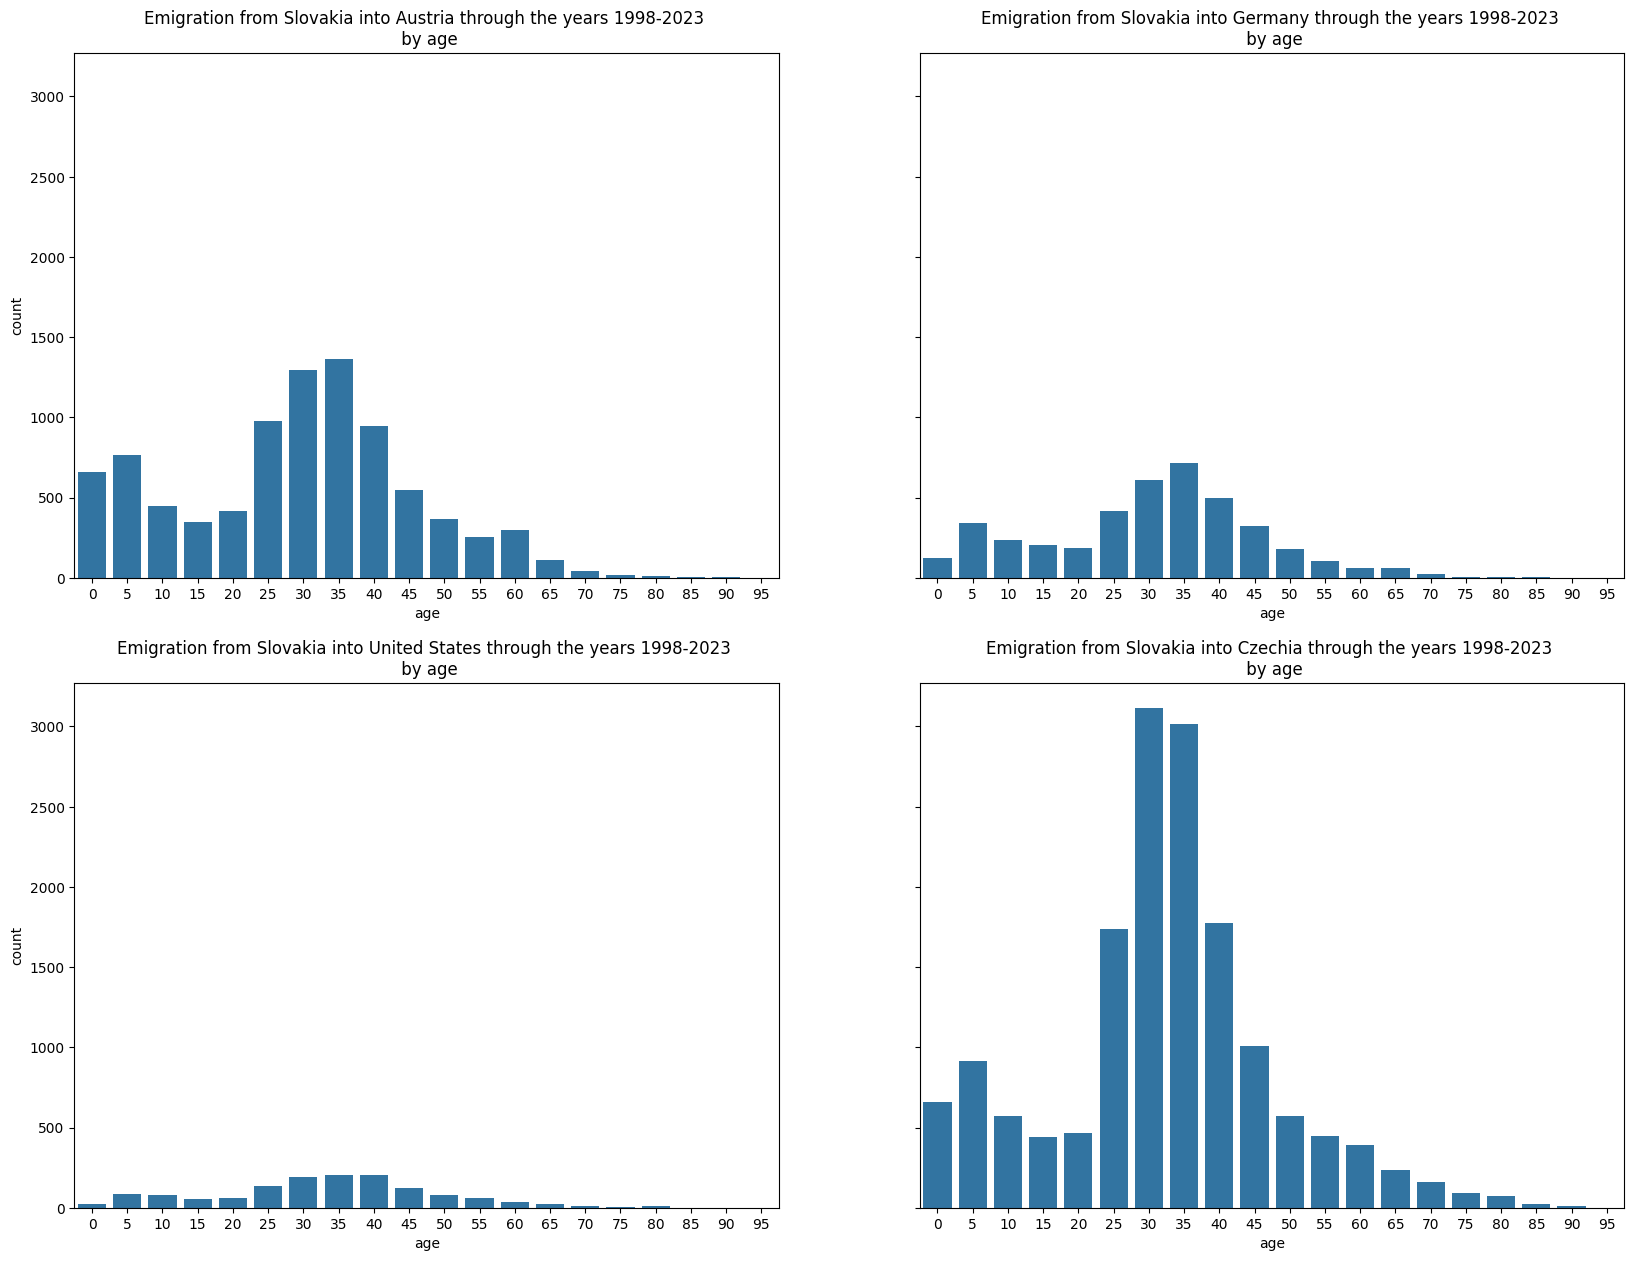

In [17]:
figure, axis = plt.subplots(2,2, figsize = (20,15), sharey = True)
c = ('Austria', 'Germany', 'United States', 'Czechia')
for i in range(2):
    for j in range(2):
        draw_age_histogram(axis = axis[i][j], country = c[i*2+j], print_info=False, print_average = True)


Myslel som si, ze uvidime posun k mladsim vekom. Nie je tak.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Emigration into Austria through years 1998 - 2023: 11135
Emigration into Germany through years 1998 - 2023: 6358
Emigration into United States through years 1998 - 2023: 2027


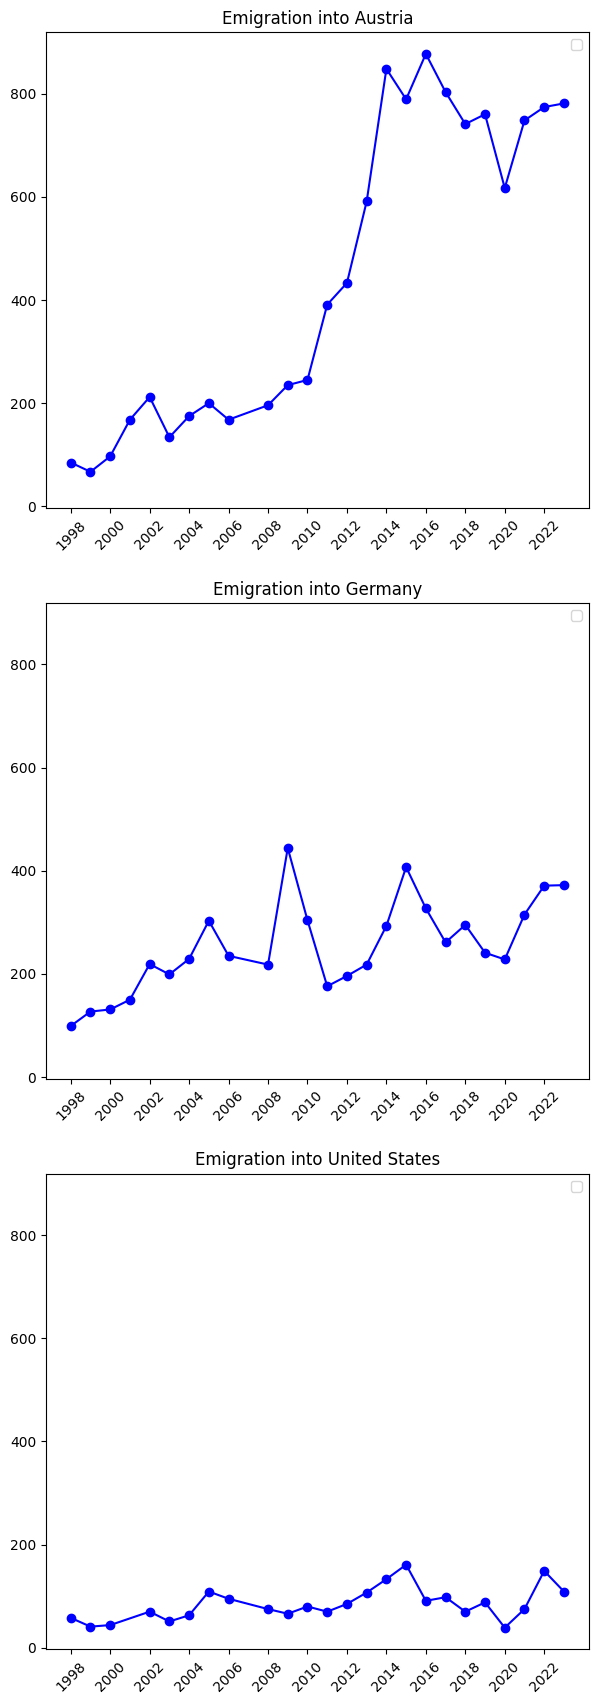

In [18]:
figure, axis = plt.subplots(3,1, figsize = (7,21), sharey=True)
for i in range(0,3):
    draw_country_time_plot(axis = axis[i], country = c[i], title = f'Emigration into {c[i]}')

Total emigration

,count,target_region
target_country,,
Total,61301,None
EU28 countries (2013-2020) except reporting country,20642,None
Czechia,20503,Europe
Austria,11135,Europe
Germany,6358,Europe


,count,target_region
target_country,,
Czechia,20503,Europe
Austria,11135,Europe
Germany,6358,Europe
United Kingdom,4345,Europe
Switzerland,2628,Europe
United States,2027,Americas
Italy,1657,Europe
Canada,1305,Americas
Hungary,1207,Europe


Text(2.5, 18500, 'Total emigration ≈ 60000')

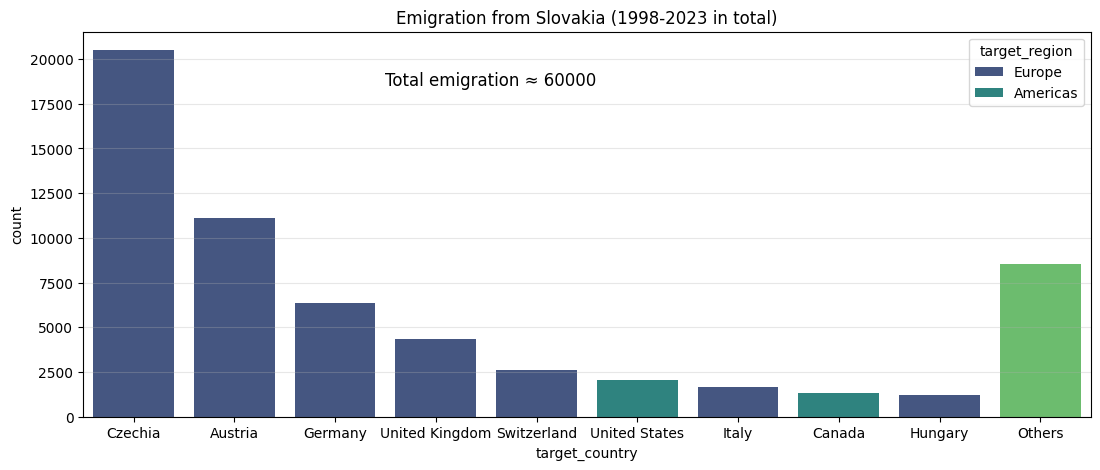

In [19]:
                                                                                # magic help: agg
general = emigr.query("sex == 'Total' and age == 'TOTAL'").groupby('target_country').agg({
    'count': 'sum',
    'target_region': 'first'  # or 'max' / 'min' if all values are the same
})
general.sort_values(by = 'count', inplace = True, ascending=False)

display(general.head())
just_countries = general.iloc[2:12].drop(index = 'Non-EU28 countries (2013-2020) nor reporting country')
just_countries.at['United Kingdom', 'target_region'] = 'Europe'
#just_countries.at['other'] = general.iloc[12 :]['count'].sum()

just_countries.loc['Others'] = general.iloc[12:]['count'].sum(), ''
display(just_countries)
total = just_countries['count'].sum()

figure, axis = plt.subplots(figsize = (13,5))
axis = sns.barplot(data = just_countries, x = just_countries.index, y = 'count', hue = 'target_region', palette = 'viridis')
axis.grid(axis = 'y', alpha = 0.3)
axis.set_title('Emigration from Slovakia (1998-2023 in total)')
axis.text(2.5,18500, s = f'Total emigration ≈ {round(total,-3)}', fontsize = 12)
# positions = [0,1,1.95,2.95,4.05,5.1,6.05,7,8]
# plt.xticks(positions, just_countries.index)
